<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 4.9 MB/s 
     |████████████████████████████████| 212 kB 63.6 MB/s 
     |████████████████████████████████| 163 kB 61.4 MB/s 
     |████████████████████████████████| 115 kB 62.8 MB/s 
     |████████████████████████████████| 127 kB 54.1 MB/s 
     |████████████████████████████████| 115 kB 52.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 43.7 MB/s 


## The CNN/DailyMail Dataset

In [2]:
from datasets import load_dataset
dataset = load_dataset("cnn_dailymail", version="3.0.0")
print(f"Features: {dataset['train'].column_names}")

  0%|          | 0/3 [00:00<?, ?it/s]

Features: ['article', 'highlights', 'id']


In [3]:
dataset.keys()

dict_keys(['train', 'validation', 'test'])

In [4]:
sample = dataset["train"][1]
print(f"""Article (excerpt of 500 characters, total length: {len(sample["article"])}):""")
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])

Article (excerpt of 500 characters, total length: 4051):
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most s

Summary (length: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


## Text Summarization Pipelines

Although the model architectures we will be exploring
have varying maximum input sizes, let’s restrict the input text to **2,000**
characters to have the same input for all models and thus make the outputs
more comparable:

In [5]:
sample_text = dataset["train"][1]["article"][:2000]
# We'll collect the generated summaries of each model in a dictionary
summaries = {}

In [6]:
sample_text

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

## Using NLTK

In [7]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download("punkt")
string = "The U.S. are a country. The U.N. is an organization."
sent_tokenize(string)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The U.S. are a country.', 'The U.N. is an organization.']

## Summarization Baseline

A common baseline for summarizing news articles is to simply take the first
three sentences of the article

In [8]:
def three_sentence_summary(text):
  return "\n".join(sent_tokenize(text)[:3])

In [9]:
summaries["baseline"] = three_sentence_summary(sample_text)

In [10]:
print(summaries["baseline"])

Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."


In [ ]:
summaries

{'baseline': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."'}

## GPT-2

One of the model’s surprising features is that we can also use it to generate summaries by simply appending “TL;DR” at the end of the input
text.

In [11]:
from transformers import pipeline, set_seed
set_seed(42)
pipe = pipeline("text-generation", model="gpt2")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [12]:
gpt2_query = sample_text + "\nTL;DR:\n"
pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [13]:
pipe_out  

[{'generated_text': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and

In [14]:
summaries["gpt2"] = "\n".join(sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))

In [15]:
print(summaries["gpt2"])


-1.
The 9th degree refers to a prisoner who is "forgotten" because of his illness

-2.
As this sentence makes no sense, it probably doesn't hold much of a weight.
Most inmates on the 9th cannot handle an indefinite term of imprisonment, and only about 20 to 30% are charged with a mental illness.
Many are on death's


## T5

In [16]:
pipe = pipeline("summarization", model="t5-large")
pipe_out = pipe(sample_text)
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


## BART == BERT + GPT2

In [17]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

In [21]:
summaries

{'baseline': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."',
 'gpt2': '\n-1.\nThe 9th degree refers to a prisoner who is "forgotten" because of his illness\n\n-2.\nAs this sentence makes no sense, it probably doesn\'t hold much of a weight.\nMost inmates on the 9th cannot handle an indefinite term of imprisonment, and only about 20 to 30% are charged with a mental illness.\nMany are on death\'s',
 't5': 'mentally ill inmates are housed on the ninth floor of a florida jail .\nmost face drug charges or charges of assaulting an officer .\njudge says arrests often res

## PEGASUS

Like BART, PEGASUS is an encoder-decoder transformer

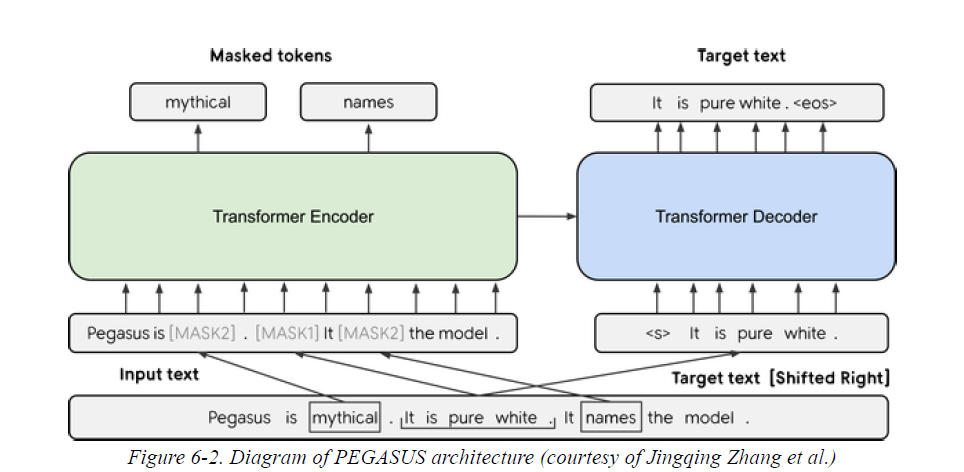

This model has a special token for newlines, which is why we don’t need
the **sent_tokenize() function**

In [23]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.0 MB/s 


In [18]:
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
pipe_out = pipe(sample_text)
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

## Comparing Different Summaries

* GPT-2 - It has not been trained on the dataset
* T5,BART and PEGASUS have been fine tuned on the dataset

In [19]:
print("GROUND TRUTH")
print(dataset["train"][1]["highlights"])
print("")
for model_name in summaries:
  print(model_name.upper())
  print(summaries[model_name])
  print("")

GROUND TRUTH
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .

BASELINE
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."

GPT2

-1.
The 9th degree refers to a prisoner who is "forgotten" because of his illness

-2.
As this sentence makes no sense, it probably doesn't hold much of a weight.
Most inmates on the 9th cannot handle an indefinite te

* summary generated by GPT-2 is quite different from the others.Often the GPT-2
model “hallucinates” or invents facts, since it was not explicitly trained to
generate truthful summaries.

* PEGASUS’s output bearing the most striking
resemblance.

## Measuring the Quality of Generated Text

#### BLEU Metric : Bilinguial Evaluation Understudy

BLEU is a precision-based metric, which
means that when we compare the two texts we count the number of words
in the generation that occur in the reference and divide it by the length of
the reference.

In [21]:
! pip install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 118 kB 5.2 MB/s 


In [22]:
from datasets import load_metric
bleu_metric = load_metric("sacrebleu")

In [23]:
import pandas as pd
import numpy as np

In [24]:
bleu_metric.add(prediction="the the the the the the", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

,Value
score,0.0
counts,"[2, 0, 0, 0]"
totals,"[6, 5, 4, 3]"
precisions,"[33.33, 0.0, 0.0, 0.0]"
bp,1.0
sys_len,6
ref_len,6


* The BLEU score also works if there are multiple reference translations. This is why
reference is passed as a list. 
* To make the metric smoother for zero counts in the ngrams,
BLEU integrates methods to modify the precision calculation. 
* One method is to
add a constant to the numerator. That way, a missing n-gram does not cause the score to
automatically go to zero. 

## ROUGE - Recall Oriented Understudy for Gisting Evaluation

ROUGE is a recall based metric which checks how many n grams in the generated text (predicted) also occur in the referrence text (actual)

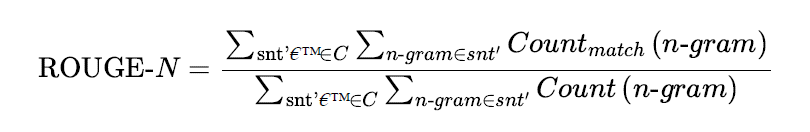

Comparing the text generated by different models based on the ROUGE metric

In [26]:
! pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=f1f5bcf83dcea1178a1a17fb3530206ccff423e9f559b4b6ce2491e34775277e
  Stored in directory: /root/.cache/pip/wheels/84/ac/6b/38096e3c5bf1dc87911e3585875e21a3ac610348e740409c76
Successfully built rouge-score


In [27]:
rouge_metric = load_metric("rouge")
reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

In [28]:
for model_name in summaries:
  rouge_metric.add(prediction=summaries[model_name], reference=reference)
  score = rouge_metric.compute()
  rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
  records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.365079,0.145161,0.206349,0.285714
gpt2,0.275229,0.018692,0.146789,0.275229
t5,0.382979,0.130435,0.255319,0.382979
bart,0.475248,0.222222,0.316832,0.415842
pegasus,0.323232,0.206186,0.282828,0.323232


* The ROUGE metric in the Datasets library also calculates confidence intervals (by
default, the 5th and 95th percentiles). 
* The average value is stored in the attribute mid
and the interval can be retrieved with low and high.

* PEGASUS and BART are the best models overall
(higher ROUGE scores are better), but T5 is slightly better on ROUGE-1
and the LCS scores. 

## Evaluating PEGASUS on the CNN/DailyMail Dataset

In [29]:
def evaluate_summaries_baseline(dataset, metric,column_text="article",column_summary="highlights"):
  summaries = [three_sentence_summary(text) for text in dataset[column_text]]
  metric.add_batch(predictions=summaries,references=dataset[column_summary])
  score = metric.compute()
  return score

In [30]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(1000))

In [31]:
test_sampled

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 1000
})

In [32]:
score = evaluate_summaries_baseline(test_sampled, rouge_metric)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)

In [33]:
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["baseline"]).T

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.389276,0.171296,0.245061,0.354239


In [34]:
from tqdm import tqdm
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
def chunks(list_of_elements, batch_size):
  """Yield successive batch-sized chunks from list_of_elements."""
  for i in range(0, len(list_of_elements), batch_size):
    yield list_of_elements[i : i + batch_size]


In [35]:
def evaluate_summaries_pegasus(dataset, 
                               metric, 
                               model, 
                               tokenizer,
                               batch_size=16, 
                               device=device,
                               column_text="article",
                               column_summary="highlights"):
  article_batches = list(chunks(dataset[column_text], batch_size))
  target_batches = list(chunks(dataset[column_summary], batch_size))
  for article_batch, target_batch in tqdm(zip(article_batches, target_batches), total=len(article_batches)):
    inputs = tokenizer(article_batch, max_length=1024, truncation=True,padding="max_length", return_tensors="pt")
    summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                               attention_mask=inputs["attention_mask"].to(device),
                               length_penalty=0.8, num_beams=8, max_length=128)
    decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,clean_up_tokenization_spaces=True) for s in summaries]
    decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]
    metric.add_batch(predictions=decoded_summaries,references=target_batch)
    score = metric.compute()
  return score

In [36]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric,model, tokenizer, batch_size=8)

100%|██████████| 125/125 [29:34<00:00, 14.19s/it]


* **ROUGE** and **BLEU** correlate better with human judgment than loss
or accuracy,

In [37]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric,
model, tokenizer, batch_size=8)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|██████████| 125/125 [29:51<00:00, 14.33s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.399064,0.199771,0.312571,0.356463


## Training a Summarization Model

In [40]:
! pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.8 MB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 357 kB 11.0 MB/s 
     |████████████████████████████████| 379 kB 43.4 MB/s 
     |████████████████████████████████| 92 kB 12.1 MB/s 
     |████████████████████████████████| 2.3 MB 44.3 MB/s 
     |████████████████████████████████| 138 kB 43.9 MB/s 


In [41]:
dataset_samsum = load_dataset("samsum")
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum]
print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_samsum['train'].column_names}")
print("\nDialogue:")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Dataset samsum downloaded and prepared to /root/.cache/huggingface/datasets/samsum/samsum/0.0.0/f1d7c6b7353e6de335d444e424dc002ef70d1277109031327bc9cc6af5d3d46e. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.


## Evaluating PEGASUS on SAMSum

In [42]:
pipe_out = pipe(dataset_samsum["test"][0]["dialogue"])
print("Summary:")
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n"))

Your max_length is set to 128, but you input_length is only 122. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


Summary:
Amanda: Ask Larry Amanda: He called her last time we were at the park together.
Hannah: I'd rather you texted him.
Amanda: Just text him .


In [43]:
score = evaluate_summaries_pegasus(dataset_samsum["test"], 
                                   rouge_metric,
                                   model,
                                   tokenizer, 
                                   column_text="dialogue",
                                   column_summary="summary", 
                                   batch_size=8)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|██████████| 103/103 [21:50<00:00, 12.72s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.191876,0.107458,0.16595,0.16595


## Fine-Tuning PEGASUS

* Before we process the data for training, we have to look at the length distribution of the input and outputs

In [38]:
import matplotlib.pyplot as plt

In [44]:
d_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["dialogue"]]
s_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]]

Token indices sequence length is longer than the specified maximum sequence length for this model (1044 > 1024). Running this sequence through the model will result in indexing errors


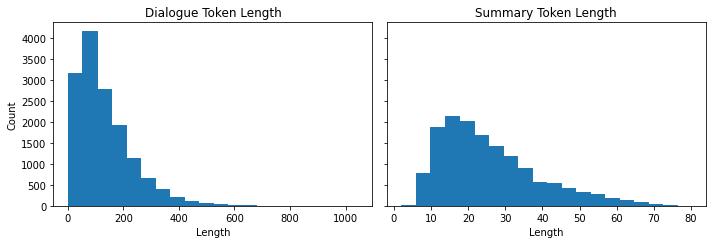

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

## Tokenize dataset

In [46]:
def convert_examples_to_features(example_batch):
  input_encodings = tokenizer(example_batch["dialogue"], max_length=1024,truncation=True)
  with tokenizer.as_target_tokenizer():
    target_encodings = tokenizer(example_batch["summary"], max_length=128,truncation=True)
  return {"input_ids": input_encodings["input_ids"],
          "attention_mask": input_encodings["attention_mask"],
          "labels": target_encodings["input_ids"]}

* A new thing in the use of the tokenization step is the
**tokenizer.as_target_tokenizer()** context. 

* Some models require
special tokens in the decoder inputs, 

* so it’s important to differentiate
between the tokenization of encoder and decoder inputs. In the with
statement (called a context manager), the tokenizer knows that it is
tokenizing for the decoder and can process sequences accordingly.

In [47]:
dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features,batched=True)
columns = ["input_ids", "labels", "attention_mask"]
dataset_samsum_pt.set_format(type="torch", columns=columns)

  0%|          | 0/15 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3543: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  "`as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your "


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

* when we prepare our batch, we set up the decoder inputs by shifting the
labels to the right by one. 
* After that, we make sure the padding tokens in
the labels are ignored by the loss function by setting them to –100. 
* We actually don’t have to do this manually, though, since the **DataCollatorForSeq2Seq** comes to the rescue and takes care of all these
steps for us:

In [48]:
from transformers import DataCollatorForSeq2Seq
from transformers import TrainingArguments, Trainer
#
seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
#
training_args = TrainingArguments(output_dir='/content/pegasus-samsum', 
                                  num_train_epochs=1, 
                                  warmup_steps=500,
                                  per_device_train_batch_size=1, 
                                  per_device_eval_batch_size=1,
                                  weight_decay=0.01, 
                                  logging_steps=10, 
                                  push_to_hub=False,
                                  evaluation_strategy='steps', 
                                  eval_steps=500, 
                                  save_steps=1e6,
                                  gradient_accumulation_steps=16)

* In case push_to_hub = True implement the below step

In [49]:
from huggingface_hub import notebook_login
notebook_login()

#### initialize the trainer 

parameters required : 
* model,
* tokenizer, 
* training arguments,
* data collator, 
* training and
* evaluation sets:

In [50]:
trainer = Trainer(model=model, 
                  args=training_args,
                  tokenizer=tokenizer, 
                  data_collator=seq2seq_data_collator,
                  train_dataset=dataset_samsum_pt["train"],
                  eval_dataset=dataset_samsum_pt["validation"])

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `PegasusForConditionalGeneration.forward` and have been ignored: summary, dialogue, id. If summary, dialogue, id are not expected by `PegasusForConditionalGeneration.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 14732
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 16
  Total optimization steps = 920
You're using a PegasusTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to

Step,Training Loss,Validation Loss


## Evaluate the Model

In [ ]:
trainer.evaluate()

In [ ]:
score = evaluate_summaries_pegasus(dataset_samsum["test"],
                                   rouge_metric, 
                                   trainer.model, 
                                   tokenizer,
                                   batch_size=2, 
                                   column_text="dialogue", 
                                   column_summary="summary")
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=[f"pegasus"])

## Make Inference

In [ ]:
custom_dialogue = """\
Thom: Hi guys, have you heard of transformers?
Lewis: Yes, I used them recently!
Leandro: Indeed, there is a great library by Hugging Face.
Thom: I know, I helped build it ;)
Lewis: Cool, maybe we should write a book about it. What do you think?
Leandro: Great idea, how hard can it be?!
Thom: I am in!
Lewis: Awesome, let's do it together!
"""

In [ ]:
inf_token = convert_examples_to_features(custom_dialogue)

In [ ]:
trainer.predict()